In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from IPython.display import Image

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

https://www.kaggle.com/dmvreddy91/usahousing

In [2]:
data = pd.read_csv("data/USA_Housing.csv", sep=',')
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data2 = data.copy()
data2.drop(['Address'], axis=1, inplace=True)

In [5]:
data2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
data2.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
sc2 = MinMaxScaler()
data2['Avg. Area Income'] = sc2.fit_transform(data2[['Avg. Area Income']])
data2['Avg. Area House Age'] = sc2.fit_transform(data2[['Avg. Area House Age']])
data2['Avg. Area Number of Rooms'] = sc2.fit_transform(data2[['Avg. Area Number of Rooms']])
data2['Avg. Area Number of Bedrooms'] = sc2.fit_transform(data2[['Avg. Area Number of Bedrooms']])
data2['Area Population'] = sc2.fit_transform(data2[['Area Population']])
data2['Price'] = sc2.fit_transform(data2[['Price']])

In [8]:
data2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


<AxesSubplot:>

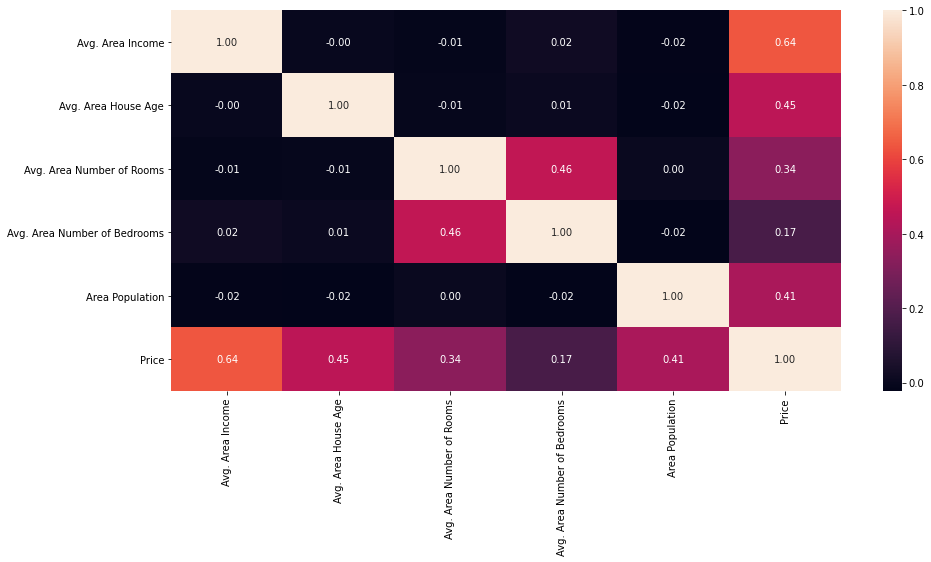

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

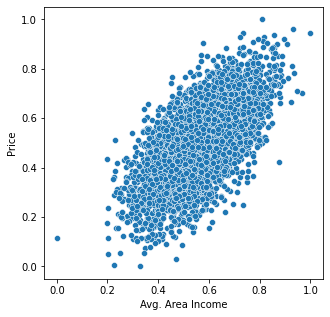

In [10]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='Avg. Area Income', y='Price', data=data2)

## Аналитическое восстановление зависимости

In [11]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [12]:
x_array = data2['Avg. Area Income'].values
y_array = data2['Price'].values

In [13]:

b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(0.0569436740926636, 0.7767973072533805)

In [14]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [15]:
y_array_regr = y_regr(x_array, b0, b1)

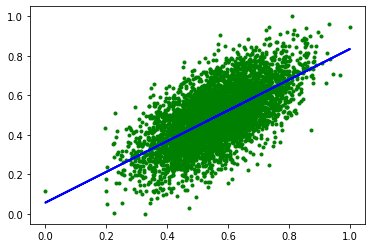

In [16]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

## Градиентный спуск

In [17]:
# Простейшая реализация градиентного спуска
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    # Значения для коэффициентов по умолчанию
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        # Вычисление новых предсказанных значений
        # используется векторизованное умножение и сложение для вектора и константы
        y_pred = b1 * x_array + b0
        # Расчет градиентов
        # np.multiply - поэлементное умножение векторов
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        # Изменение значений коэффициентов:
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    # Результирующие значения
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred
    

In [18]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(y_array_regr, grad_y_pred)))
    plt.plot(x_array, y_array, 'g.')
    plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
    plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = 0.0569436740926636 - (теоретический), 0.07832559028348723 - (градиентный спуск)
b1 = 0.7767973072533805 - (теоретический), 0.7393479571522464 - (градиентный спуск)
MSE = 1.9756927634270483e-05


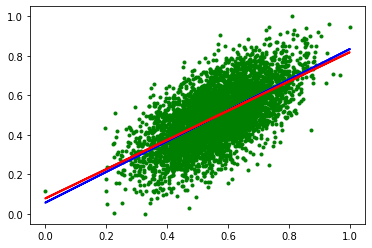

In [19]:
# Примеры использования градиентного спуска
show_gradient_descent(10000, 0.03, 0.7)

## Линейная регрессия

In [20]:
# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, reg1.coef_), (b0, reg1.intercept_)

((0.7767973072533805, array([[0.77679731]])),
 (0.0569436740926636, array([0.05694367])))

## SVM

In [21]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [22]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(x_array.reshape(-1, 1), y_array)
    y_pred = clf.predict(x_array.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(x_array, y_array, 'b.')
    ax.plot(x_array, y_pred, 'ro')
    plt.show()

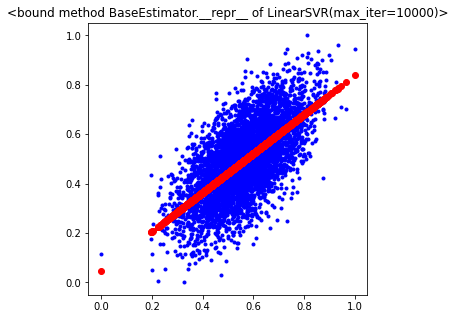

In [23]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

In [24]:
feature_cols = [
    'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population'
]
data_X = data2.loc[:,feature_cols]
data_Y = data2.loc[:, 'Price']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_X, data_Y,test_size=0.2, random_state=1)

In [25]:
svr = SVR()
svr.fit(data_X_train, data_y_train)

SVR()

In [26]:
y_pred = svr.predict(data_X_test)

In [27]:
mean_absolute_error(data_y_test, y_pred), mean_squared_error(data_y_test, y_pred)

(0.03647269807042258, 0.0021037447687657002)

## Деревья решений

In [28]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from io import StringIO 
import pydotplus

In [29]:
# Обучим дерево и предскажем результаты
tree_regr = DecisionTreeRegressor(random_state=1).fit(data_X_train, data_y_train)
y_test_predict = tree_regr.predict(data_X_test)
y_test_predict.shape

(1000,)

In [30]:
mean_absolute_error(data_y_test, y_test_predict), mean_squared_error(data_y_test, y_test_predict)

(0.05498787654432459, 0.00477662697552836)

In [31]:
list(zip(data_X_train.columns.values, tree_regr.feature_importances_))

[('Avg. Area Income', 0.41910241293332434),
 ('Avg. Area House Age', 0.23716299553194312),
 ('Avg. Area Number of Rooms', 0.1303028082431395),
 ('Avg. Area Number of Bedrooms', 0.01757464766385183),
 ('Area Population', 0.19585713562774112)]

In [32]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [33]:
tree_regr_depth3 = DecisionTreeRegressor(random_state=1, max_depth=3).fit(data_X_train, data_y_train)
tree_regr_depth3

DecisionTreeRegressor(max_depth=3, random_state=1)

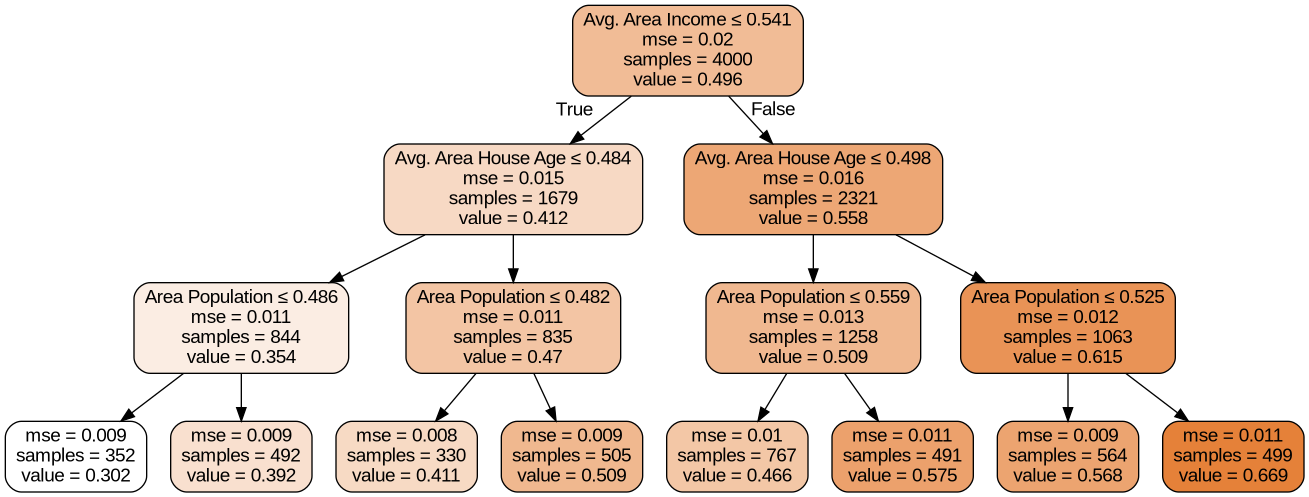

In [34]:
Image(get_png_tree(tree_regr_depth3, feature_cols), height='70%')